<a href="https://colab.research.google.com/github/leenago/Seaborn/blob/master/Seaborn_document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시각화

- 데이터를 테이블만 보고 직관적으로 이해하는 것이 어려움
- 데이터를 잘 정리해서, 상대방이 의사결정을 할 수 있도록 '시각화' 하는 것이 중요하다.
- 도메인 지식이 있어야 바른 시각화도 할 수 있는 것.
- '분석의 속도'보다 중요한 것은 '**분석의 방향성**'이다.

### 1) 시각화의 기본 원리
- 비교대조 차이를 드러내라
  - Grouping을 하게 되면 한 눈에 보기 쉽게 비교를 할 수 있음.

- 인과관계와 상관관계를 보여주기
  -  



![](https://drive.google.com/uc?export=view&id=1vpcnkLoIMRCC7Xo4H_udsGu_m0OT8Di5)

- 데이터를 먼저 시각화 한 후, 재범주화를 해서 또 다시 검증 과정을 진행한다.
- 검증 과정에서 통계는 불가피하기 때문에, 통계는 필수이다.
- 비교대조를 하기 위해서, 그룹

# Seaborn Document - Plotting functions

- Statistical analysis is a process of understanding **how variables in a dataset relate to each other** and **how those relationships depend on other variables**. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

- replot(relational plot)(): This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots.

- scatterplot(), lineplot()이 있다.

## 1) Visualizing statistical relationships

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Parameters>
context : string or dict

    Plotting context parameters, see :func:`plotting_context`  
style : string or dict

    Axes style parameters, see :func:`axes_style`  
palette : string or sequence

    Color palette, see :func:`color_palette`  
font : string

    Font family, see matplotlib font manager.  
font_scale : float, optional

    Separate scaling factor to independently scale the size of the  
    font elements.  
color_codes : bool

    If `True` and `palette` is a seaborn palette, remap the shorthand  
    color codes (e.g. "b", "g", "r", etc.) to the colors from this palette.  
rc : dict or None

    Dictionary of rc parameter mappings to override the above.

### (1) Relating variables witht scatter plots
- scatter plots(산점도): 도표 위에 두 변수 엑스(X)와 와이(Y) 값이 만나는 지점을 표시한 그림. 이 그림을 통해 두 변수 사이의 관계를 알 수 있다.
- scatterplot()은 replot()의 default kind이다. (kind = 'scatter'로 지정도 가능)

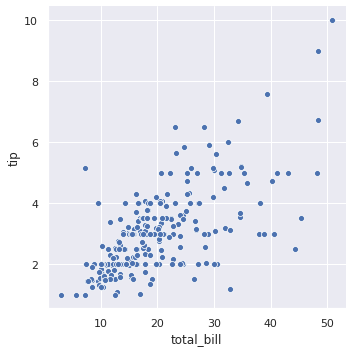

In [2]:
tips = sns.load_dataset("tips")  #tips라는 데이터를 로드함
sns.relplot(x='total_bill', y='tip', data=tips);

- 포인트들이 2차원인 경우, 다른 차원의 점이 coloring 될 수 있으며, 의미를 가지게 된다. Seaborn에서는 이것을 "hue semantic(hue: 색조/ semantic: 의미의)"이라고 한다.

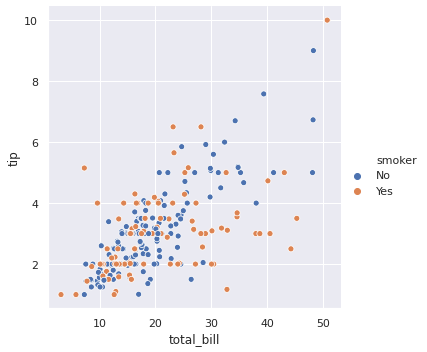

In [3]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips);

- 클래스 간의 차이를 확연히 하고 이해를 쉽게 하기 위해서, marker style을 다르게 설정할 수도 있다.

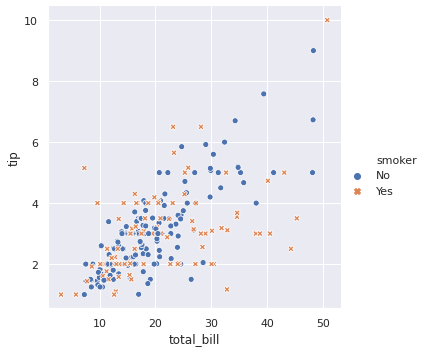

In [4]:
sns.relplot(x='total_bill', y='tip', hue='smoker', style = 'smoker', data=tips);

- 4개의 변수를 hue와 style 변경으로 각각 나타낼 수 있다. 
- 사람은 color보다 shape에 덜 sensitive 하기 때문에, 이 방법은 잘 생각하고 써야한다!

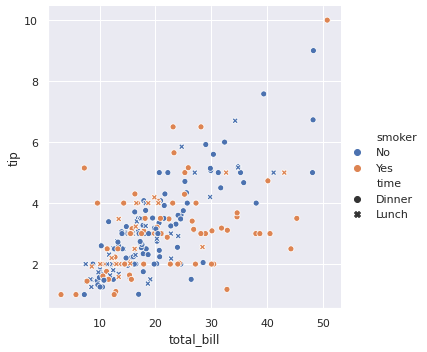

In [5]:
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=tips);
#style이 바뀜

'hue semantic'이 숫자인 경우(특히 소수인 경우), default값의 sequential palette로 색이 바뀐다.

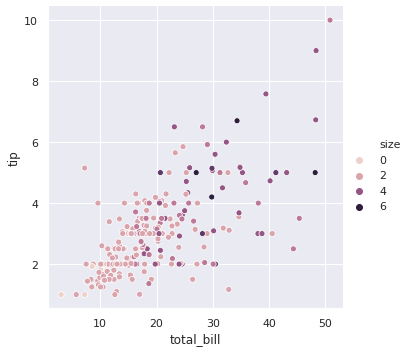

In [6]:
sns.relplot(x='total_bill', y='tip', hue='size', data=tips);

- 'cubehelix_palette()'를 이용해서 customize도 가능

cf) cubehelix_palette(): This produces a colormap with linearly-decreasing (or increasing) brightness. *다시 정리!

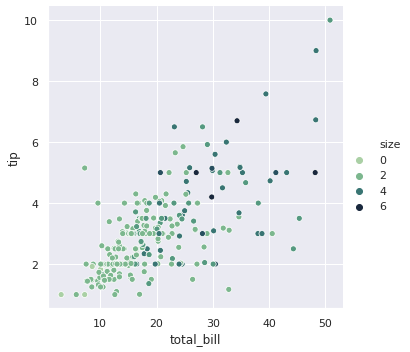

In [7]:
sns.relplot(x='total_bill', y='tip', hue='size', palette = 'ch:r=-.5, l=.75', data=tips);
#pal

-  The third kind of semantic variable changes the size of each point:



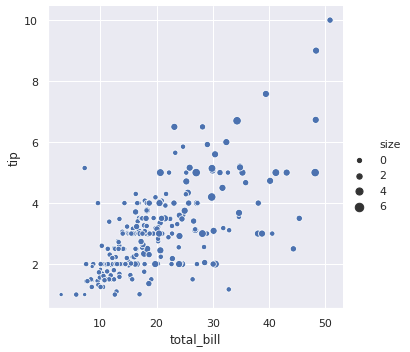

In [8]:
sns.relplot(x='total_bill', y='tip', size='size', data=tips);

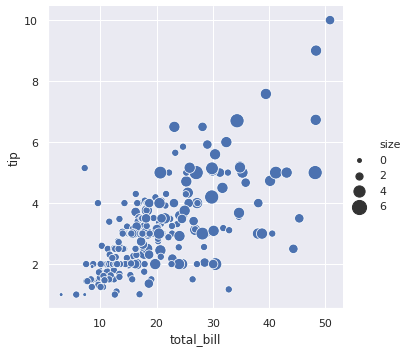

In [9]:
sns.relplot(x='total_bill', y='tip', size='size', sizes=(15,200), data=tips);

### (2) Emphasizing continuity with line plots

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

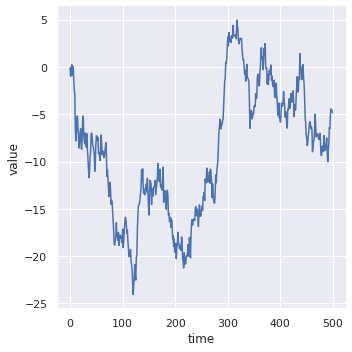

In [10]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

g= sns.relplot(x='time', y='value', kind='line', data=df)

In [11]:
g.fig.autofmt_xdate()  # ???

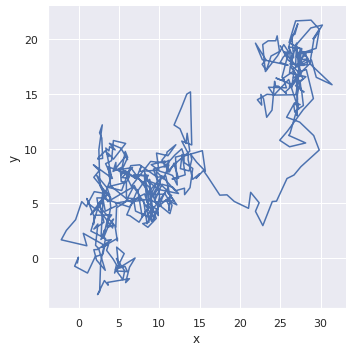

In [12]:
df = pd.DataFrame(np.random.randn(500,2).cumsum(axis=0), columns=['x','y'])
sns.relplot(x='x', y='y', sort=False, kind='line', data=df)

### (3) Aggregation and representing uncertainty

- More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [13]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


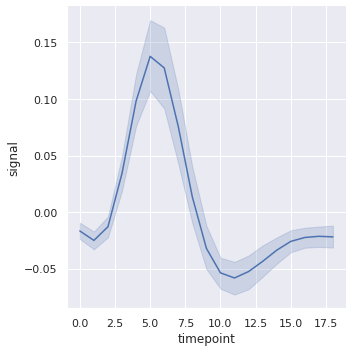

In [14]:
sns.relplot(x="timepoint", y="signal", kind='line', data=fmri);

- The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

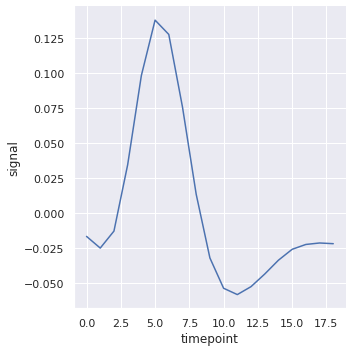

In [15]:
sns.relplot(x='timepoint', y='signal', ci=None, kind="line", data=fmri);

- Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

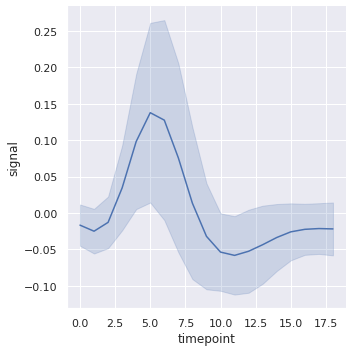

In [16]:
sns.relplot(x='timepoint', y='signal', kind = 'line', ci='sd', data=fmri);

- To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

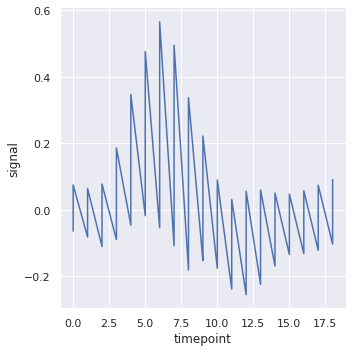

In [17]:
sns.relplot(x='timepoint', y='signal', estimator=None, kind='line', data=fmri);